# Data Analysis 2

This notebook is ***NEW CONTINUING*** from previous notebooks in the [notebooks](https://github.com/Data-Science-for-Linguists-2023/For-Reddit-Grammaticality-Analysis/tree/main/notebooks) folder. Therefore, before reading through this notebook, I recommend going through [Data Collection](https://github.com/Data-Science-for-Linguists-2023/For-Reddit-Grammaticality-Analysis/blob/main/notebooks/dataCollection.ipynb), [Data Organization](https://github.com/Data-Science-for-Linguists-2023/For-Reddit-Grammaticality-Analysis/blob/main/notebooks/dataOrganization.ipynb), and then [Data Analysis 1](https://github.com/Data-Science-for-Linguists-2023/For-Reddit-Grammaticality-Analysis/blob/main/notebooks/dataAnalysis1.ipynb), in that order.

[nbviewer](https://nbviewer.org/github/Data-Science-for-Linguists-2023/For-Reddit-Grammaticality-Analysis/blob/main/notebooks/dataAnalysis2.ipynb)

**Outline**

1. [Setting Up](#Setting-Up)

2. [Recap](#Recap)

3. [Spelling Error Exploration](#Spelling-Error-Exploration)

4. [Spelling Error Analysis](#Spelling-Error-Analysis)

5. [Collecting Top Errors (again)](#Collecting-Top-Errors-(again))

6. [Normalization](#Normalization)

7. [Top Error Analysis](#Top-Error-Analysis)

8. [Comparison Across Subreddits](#Comparison-Across-Subreddits)

8. [Upvote Analysis](#Upvote-Analysis)

8. [Summary](#Summary)

## Setting Up

In [79]:
# Start with importing our libraries
import language_tool_python as ltp  
import pandas as pd 
import numpy as np
import nltk
import re
import matplotlib.pyplot as plt

In [3]:
# This sets up our parsing tool
tool = ltp.LanguageTool('en-US')

In [4]:
# Using pandas to read csv files in 

legalAdvice = pd.read_csv("../final-data/finalLegalData.csv", index_col = 0)
adulting = pd.read_csv('../final-data/finalAdData.csv', index_col = 0)
medicine = pd.read_csv('../final-data/finalMedData.csv', index_col = 0)
highschool = pd.read_csv('../final-data/finalHsData.csv', index_col = 0)
broadway = pd.read_csv('../final-data/finalBwayData.csv', index_col = 0)
pittsburgh = pd.read_csv('../final-data/finalPghData.csv', index_col = 0)
rant = pd.read_csv('../final-data/finalRantData.csv', index_col = 0)
ccq = pd.read_csv('../final-data/finalCcqData.csv', index_col = 0)
anime = pd.read_csv('../final-data/finalAnimeData.csv', index_col = 0)
eli5 = pd.read_csv('../final-data/finalElifData.csv', index_col = 0)
college = pd.read_csv('../final-data/finalCollegeData.csv', index_col = 0)
sports = pd.read_csv('../final-data/finalSportsData.csv', index_col = 0)
crypto = pd.read_csv('../final-data/finalCryptoData.csv', index_col = 0)
lawyertalk = pd.read_csv('../final-data/finalLawyerData.csv', index_col = 0)
gaming = pd.read_csv('../final-data/finalGamingData.csv', index_col = 0)

In [5]:
crypto

,Title,Id,Text,Author,Number of Comments,Number of Upvotes,Ratio of Upvotes
0,Moon Week 37,11t058d,Hello everyone and welcome to Moon Week for ro...,MoonWeek,668,102,0.88
1,"Daily General Discussion - March 19, 2023 (GMT+0)",11v58f9,**Welcome to the Daily General Discussion thre...,CryptoDaily-,5390,82,0.94
2,I went to the supermarket here in Venezuela an...,11vnevt,"Hi guys, as you probably know I'm Venezuelan l...",WorkingLime,630,979,0.85
3,Having An Emergency Fund Is One Of The Most Im...,11vqd67,I rarely hear people recommend having an emerg...,kirtash93,172,87,0.80
4,I just realized i lost about 900$,11vw1ps,"I was kinda active at one time in here, moved ...",KermitTheFrogo01,88,30,0.86
...,...,...,...,...,...,...,...
418,Don't Let Hackers Drain Your Crypto Wallets: S...,11t0wcb,I decided to create this post because of the e...,kirtash93,36,15,0.70
419,Storing Your Seed Phrase (give me a better ide...,11t0j05,"Obviously, there are a lot of opinions on how ...",Nonchalant_Calypso,216,25,0.75
420,Noob question about cold storage,11t0bda,I've looked into it and I still have some ques...,Randompersonxxxx,26,5,0.78
421,Moon Week 37,11t058d,Hello everyone and welcome to Moon Week for ro...,MoonWeek,697,113,0.89


In [6]:
# Getting all of the text

allSportsVals = list(sports['Text'].values)
allLegalVals = list(legalAdvice['Text'].values)
allAdultVals = list(adulting['Text'].values)
allMedVals = list(medicine['Text'].values)
allHsVals = list(highschool['Text'].values)
allBwayVals = list(broadway['Text'].values)
allPghVals = list(pittsburgh['Text'].values)
allRantVals = list(rant['Text'].values)
allCcqVals = list(ccq['Text'].values)
allAnimeVals = list(anime['Text'].values)
allEli5Vals = list(eli5['Text'].values)
allCollegeVals = list(college['Text'].values)
allCryptoVals = list(crypto['Text'].values)
allLawyerVals = list(lawyertalk['Text'].values)
allGamingVals = list(gaming['Text'].values)

sportsErrors, legalErrors, adultErrors, medErrors, hsErrors, bwayErrors, pghErrors, rantErrors, ccqErrors, animeErrors, eli5Errors, collegeErrors, cryptoErrors, lawyerErrors, gamingErrors = [], [], [], [], [], [], [], [], [], [], [], [], [], [], []


In [7]:
# Iterating through each value and using the tool

[sportsErrors.append(tool.check(x)) for x in allSportsVals]
[legalErrors.append(tool.check(x)) for x in allLegalVals]
[adultErrors.append(tool.check(x)) for x in allAdultVals]
[medErrors.append(tool.check(x)) for x in allMedVals]
[hsErrors.append(tool.check(x)) for x in allHsVals]
[bwayErrors.append(tool.check(x)) for x in allBwayVals]
[pghErrors.append(tool.check(x)) for x in allPghVals]
[rantErrors.append(tool.check(x)) for x in allRantVals]
[ccqErrors.append(tool.check(x)) for x in allCcqVals]
[animeErrors.append(tool.check(x)) for x in allAnimeVals]
[eli5Errors.append(tool.check(x)) for x in allEli5Vals]
[collegeErrors.append(tool.check(x)) for x in allCollegeVals]
[cryptoErrors.append(tool.check(x)) for x in allCryptoVals]
[lawyerErrors.append(tool.check(x)) for x in allLawyerVals]
[gamingErrors.append(tool.check(x)) for x in allGamingVals]
print("Done processing")

Done processing


## Recap

After our analysis last time, we discovered the most frequently occuring grammatical errors in each of the subreddits. Here it is again for reference:

**COMMA_COMPOUND_SENTENCE** - Legal Advice, Adulting, College

**MORFOLOGIK_RULE_EN_US** - Medicine, Highschool, Broadway, Pittsburgh, Rant, Ccq, Anime, Eli5, Sports, Cryptocurrency, Lawyer Talk, Gaming

Let's take a closer look at what each of these errors looks like.

In [8]:
# Showing an error
hsErrors[30]

[Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': ['Texas', 'texts', 'Texans', 'teas', 'Texan', 'TeXes', 'team', 'teams', 'tells', 'terms', 'text', 'tests', 'taxes', 'tea', 'Vegas', 'exam', 'seas', 'teens', 'tends', 'tens', 'eras', 'exams', 'sexes', 'taxa', 'tear', 'tears', 'tents', 'peas', 'taxis', 'TeX', 'Tess', 'Vedas', 'nexus', 'teak', 'tease', 'terns', 'Lexus', 'Tessa', 'Texaco', 'tapas', 'teal', 'tees', 'temps', 'Degas', 'TCAS', 'hexes', 'mesas', 'techs', 'tetras', 'tubas', 'betas', 'lexis', 'teems', 'togas', 'tunas', 'exes', 'teals', 'twas', 'yeas', 'Nexis', 'degas', 'vexes', 'leas', 'etas', 'teaks', 'teds', 'tuxes', 'zetas', 'CERAS', 'DEXA', 'EAS', 'ETAS', 'EXS', 'SEAS', 'TES', 'TESS', 'TEVA', 'Tex', 'Tomas', 'teat', 'teats', 'thetas', 'treas', 'Alexas', 'Bexar', 'EFAs', 'ETAs', 'Keras', 'Lexa', 'TAS', 'TECS', 'TEUs', 'TPAs', 'Telus', 'Teslas', 'Tomás', 'sexts', 'tRNAs'], 'offsetInContext': 43, 'context': '...est **free** 

As seen above, we have two MORFOLOGIK_RULE_EN_US rules broken(the third rule broken is EN_CONTRACTION_SPELLING, but it is not relevant to our analysis right now). Specifically, these rules have the ruleIssueType of 'misspelling'.

Let's explore just how prominent 'misspelling' ruleIssueTypes are.

## Spelling Error Exploration

In [9]:
# Declaring new list
misspellingErrors = []

In [10]:
# Function for collecting all misspelling errors

def addingErrors(subreddit):
    counter = 0
    counterAll = 0
    for x in subreddit:
        if x:
            counterAll += 1
            for y in x:
                if y.ruleIssueType == 'misspelling':
                    counter += 1
                    misspellingErrors.append(y)
                    break
    print(str(counter) + ', ' + str(counterAll))

In [11]:
# Running each subreddit through the function

addingErrors(sportsErrors)
addingErrors(legalErrors)
addingErrors(adultErrors)
addingErrors(medErrors)
addingErrors(hsErrors)
addingErrors(bwayErrors)
addingErrors(pghErrors)
addingErrors(rantErrors)
addingErrors(ccqErrors)
addingErrors(animeErrors)
addingErrors(eli5Errors)
addingErrors(collegeErrors)
addingErrors(cryptoErrors)
addingErrors(lawyerErrors)
addingErrors(gamingErrors)

1153, 1269
823, 1301
766, 1290
977, 1231
916, 1229
902, 1178
718, 1085
1032, 1340
860, 1240
1259, 1372
466, 828
777, 1272
1272, 1423
658, 1102
930, 1192


In [12]:
# Adding up all of the numbers

total1 =  1269 + 1301 + 1290 + 1231 + 1229 + 1178 + 1085 + 1340 + 1240 + 1372 + 828 + 1272 + 1423 + 1102 + 1192
total2 = 1153 + 823 + 766 + 977 + 916+ 902+ 718+ 1032+ 860+ 1259+ 466+ 777+ 1272+ 658+ 930
print(total1)
print(total2)

18352
13509


Wow. That means in all of the 18352 errors, 13509 of them are misspelling errors. That is 73.61% of all of the errors. 

Let's explore some of these misspelling errors to see what is going on.

## Spelling Error Analysis

In this instance, the language tool has detected a genuine spelling error. Using context, one can conclude that this person meant to say "questions" instead of "quesions".

In [13]:
# Showing an error

misspellingErrors[1226]

Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': ['questions'], 'offsetInContext': 43, 'context': '...eos and images are illegal. I have some quesions:  1. Do I need to report images or vide...', 'offset': 512, 'errorLength': 8, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': 'I have some quesions:'})

In this instance, however, the language tool has detected a spelling error, however it is not a true spelling error. The tool has an issue with the word "Tveit", when this is the last name of someone(Aaron Tviet). This isn't an actual error, but the tool believes that it is. The same thing happens in the error below it, but this time with the name of a website, 'Carmax'.

In [14]:
# Showing an error

misspellingErrors[5000]

Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': ['That', 'Trait', 'Teat', 'Twat'], 'offsetInContext': 43, 'context': "... see it in the first place is for Aaron Tveit. I've *really* wanted to see him live a...", 'offset': 134, 'errorLength': 5, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': "In late March/Early April, I'm going to see Moulin Rouge, but the only reason I even wanted to see it in the first place is for Aaron Tveit."})

In [15]:
# Showing an error

misspellingErrors[2390]

Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': ['Car max', 'CARFAX'], 'offsetInContext': 43, 'context': '...w expensive cars are & how dealers like Carmax are selling vehicles old as 2011. Wonde...', 'offset': 57, 'errorLength': 6, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': "Didn't realize how expensive cars are & how dealers like Carmax are selling vehicles old as 2011."})

In this instance, the language tool detects a spelling error, but its validity is debatable. The person who wrote the post decided to shorten "calculus" to "calc", a valid way of saying calculus online. Therefore, in the context of this post, this isn't really a grammatical error that tells us much.

In [16]:
# Showing an error

misspellingErrors[6444]

Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': ['unmediated'], 'offsetInContext': 43, 'context': '...vely terrible all the time, or I can be unmedicated and deal with my mental illnesses at th...', 'offset': 166, 'errorLength': 11, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': 'I can either be on medication for my mental illness and have greatly reduced symptoms but lose my personality and feel objectively terrible all the time, or I can be unmedicated and deal with my mental illnesses at their full capacity and also feel objectively terrible.'})

In this instance, the language too detects a spelling error, but its validity is debatable. The tool does not like the word 'yinzer', which is a word that is used, and is seen as valid, in a particular region. Therefore, this isn't a grammatical error of much substance.

In [17]:
# Showing an error

misspellingErrors[8249]

Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': [], 'offsetInContext': 5, 'context': '*Spy Kyoushitsu*, episode 10    # [Rate this episode he...', 'offset': 5, 'errorLength': 10, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': '*Spy Kyoushitsu*, episode 10'})

In the instances below, the language tool detects spelling errors that are more relevant to what I am looking for. For example, it detects an issue with the word "whos", the lack of a possessive apostrophe, separating a word into two parts, and not including an apostrophe.

In [18]:
# Showing an error

misspellingErrors[70]

Match({'ruleId': 'WHOS', 'message': 'Did you mean “whose”?', 'replacements': ['whose'], 'offsetInContext': 43, 'context': '...ely curious. Not asking for opinions on who’s deserving, just want an idea of what to...', 'offset': 46, 'errorLength': 5, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': "Not asking for opinions on who's deserving, just want an idea of what to expect."})

In [19]:
# Showing an error

misspellingErrors[3310]

Match({'ruleId': 'TOMORROW_POSSESSIVE_APOSTROPHE', 'message': 'It seems that a possessive apostrophe is missing.', 'replacements': ["today's"], 'offsetInContext': 43, 'context': '...rious about the utility of an MD/MBA in todays landscape, wrt maneuvering to admin or ...', 'offset': 47, 'errorLength': 6, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': 'Just curious about the utility of an MD/MBA in todays landscape, wrt maneuvering to admin or consulting jobs.'})

In [20]:
# Showing an error

misspellingErrors[6246]

Match({'ruleId': 'EN_COMPOUNDS', 'message': 'This word is normally spelled as one.', 'replacements': ['multicultural'], 'offsetInContext': 43, 'context': "...lot of time to explore.  I tend to love multi-cultural foods, I haven't gotten the chance to e...", 'offset': 305, 'errorLength': 14, 'category': 'MISC', 'ruleIssueType': 'misspelling', 'sentence': "I tend to love multi-cultural foods, I haven't gotten the chance to eat nearly enough different cuisines, but I'm also never going to say no to a good burger, you know?"})

In [21]:
# Showing an error

misspellingErrors[2936]

Match({'ruleId': 'EN_CONTRACTION_SPELLING', 'message': 'Possible spelling mistake found.', 'replacements': ["haven't"], 'offsetInContext': 43, 'context': '...rn how to do these in med school, but I havent heard doctors doing it themselves (unle...', 'offset': 178, 'errorLength': 6, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': 'We learn how to do these in med school, but I havent heard doctors doing it themselves (unless they are pathologists).'})

So... what does that mean for our analysis?

Well, as we saw above, the language tool isn't always correct. It categorizes people's names, regional words, and internet slang as misspellings. Although the language tool is benefical as a whole, it was not meant to deal with online discourse in a lot of ways demonstrated above. For the purposes of this project, I believe it would be best to remove matches that have both 'ruleId' equal to 'MORFOLOGIK_RULE_EN_US' and 'ruleIssueType' equal to 'misspelling'. This would remove many of the non-typos from consideration. This would also remove genuine typos from these errors. However, these errors do not really say a lot about the grammaticality of a post in the first place.

## Collecting Top Errors (again)

Since we want to look beyond spelling errors, let's collect the top errors again for our analysis

In [22]:
# For each subreddit, append the rule id to the list

simplifiedColErrors, simplifiedSportsErrors, simplifiedLegalErrors, simplifiedAdultErrors, simplifiedMedErrors, simplifiedHsErrors, simplifiedBwayErrors, simplifiedPghErrors, simplifiedRantErrors, simplifiedCcqErrors, simplifiedAnimeErrors, simplifiedEli5Errors, simplifiedCryptoErrors, simplifiedLawyerErrors, simplifiedGamingErrors  = [], [], [], [], [], [], [], [], [], [], [], [], [], [], []
[simplifiedColErrors.append(y.ruleId) for x in collegeErrors for y in x]
[simplifiedSportsErrors.append(y.ruleId) for x in sportsErrors for y in x]
[simplifiedLegalErrors.append(y.ruleId) for x in legalErrors for y in x]
[simplifiedAdultErrors.append(y.ruleId) for x in adultErrors for y in x]
[simplifiedMedErrors.append(y.ruleId) for x in medErrors for y in x]
[simplifiedHsErrors.append(y.ruleId) for x in hsErrors for y in x]
[simplifiedBwayErrors.append(y.ruleId) for x in bwayErrors for y in x]
[simplifiedPghErrors.append(y.ruleId) for x in pghErrors for y in x]
[simplifiedRantErrors.append(y.ruleId) for x in rantErrors for y in x]
[simplifiedCcqErrors.append(y.ruleId) for x in ccqErrors for y in x]
[simplifiedAnimeErrors.append(y.ruleId) for x in animeErrors for y in x]
[simplifiedEli5Errors.append(y.ruleId) for x in eli5Errors for y in x]
[simplifiedCryptoErrors.append(y.ruleId) for x in cryptoErrors for y in x]
[simplifiedLawyerErrors.append(y.ruleId) for x in lawyerErrors for y in x]
[simplifiedGamingErrors.append(y.ruleId) for x in gamingErrors for y in x]

print("Done")

Done


In [23]:
# Create a set of all errors
allErrors = set(simplifiedColErrors + simplifiedSportsErrors + simplifiedLegalErrors + simplifiedAdultErrors 
    + simplifiedMedErrors + simplifiedHsErrors + simplifiedBwayErrors + simplifiedPghErrors + simplifiedRantErrors
   + simplifiedCcqErrors + simplifiedAnimeErrors + simplifiedEli5Errors + simplifiedCryptoErrors + 
   simplifiedLawyerErrors + simplifiedGamingErrors)

# Remove errors that do not help us in our analysis

# We have discussed this error
allErrors.remove('MORFOLOGIK_RULE_EN_US')

# This error is for the use of IDK
allErrors.remove('IDK')

# This error is for forgetting an accent on the word Pokemon. While the accent is important, it is not helpful in my analysis
allErrors.remove('POKEMON')

# This error is for starting multiple sentences the same way(Ex: 'I am going to the park. I am happy to go to the park')
allErrors.remove('ENGLISH_WORD_REPEAT_BEGINNING_RULE')

In [24]:
# Function for counting errors instead of copying this function over and over again for each subreddit
def countThis(errors, new):
    for x in allErrors:
        y = errors.count(x)
        new.append((x, y))

In [25]:
# Declaring a bunch of lists
col, sp, le, ad, med, hs, bway, pgh, rant, ccq, ani, eli5, cry, law, gam = [], [], [], [], [], [], [], [], [], [], [], [], [], [], []

# Calling function on each subreddit
countThis(simplifiedColErrors, col)
countThis(simplifiedSportsErrors, sp)
countThis(simplifiedLegalErrors, le)
countThis(simplifiedAdultErrors, ad)
countThis(simplifiedMedErrors, med)
countThis(simplifiedHsErrors, hs)
countThis(simplifiedBwayErrors, bway)
countThis(simplifiedPghErrors, pgh)
countThis(simplifiedRantErrors, rant)
countThis(simplifiedCcqErrors, ccq)
countThis(simplifiedAnimeErrors, ani)
countThis(simplifiedEli5Errors, eli5)
countThis(simplifiedCryptoErrors, cry)
countThis(simplifiedLawyerErrors, law)
countThis(simplifiedGamingErrors, gam)

In [26]:
# For each of the subreddits below, sort for the top errors
col.sort(key = lambda x: x[1])
col[1013:]

[('WANNA', 63),
 ('COMMA_PARENTHESIS_WHITESPACE', 90),
 ('EN_COMPOUNDS', 112),
 ('COMMA_COMPOUND_SENTENCE_2', 126),
 ('WHITESPACE_RULE', 144),
 ('EN_CONTRACTION_SPELLING', 171),
 ('UPPERCASE_SENTENCE_START', 439),
 ('I_LOWERCASE', 961),
 ('COMMA_COMPOUND_SENTENCE', 1299)]

### College

<BarContainer object of 9 artists>

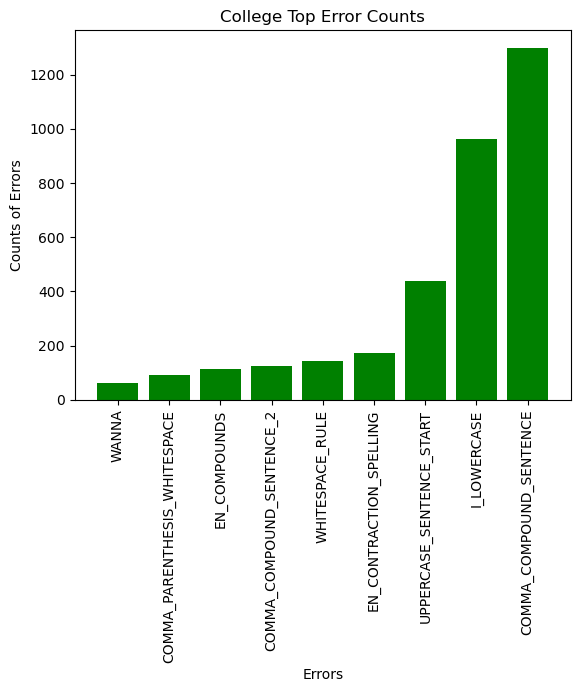

In [27]:
# Creating a bar chart of results

x = [x[0] for x in col][1013:]
y = [x[1] for x in col][1013:]
plt.xticks(rotation = 90)
plt.title("College Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'green')

### Sports

In [28]:
sp.sort(key = lambda x: x[1])
sp[1013:]

[('COMMA_PARENTHESIS_WHITESPACE', 53),
 ('EN_CONTRACTION_SPELLING', 67),
 ('SENTENCE_WHITESPACE', 70),
 ('UPPERCASE_SENTENCE_START', 71),
 ('COMMA_COMPOUND_SENTENCE_2', 87),
 ('EN_DIACRITICS_REPLACE', 94),
 ('EN_UNPAIRED_BRACKETS', 100),
 ('COMMA_COMPOUND_SENTENCE', 292),
 ('WHITESPACE_RULE', 1213)]

<BarContainer object of 9 artists>

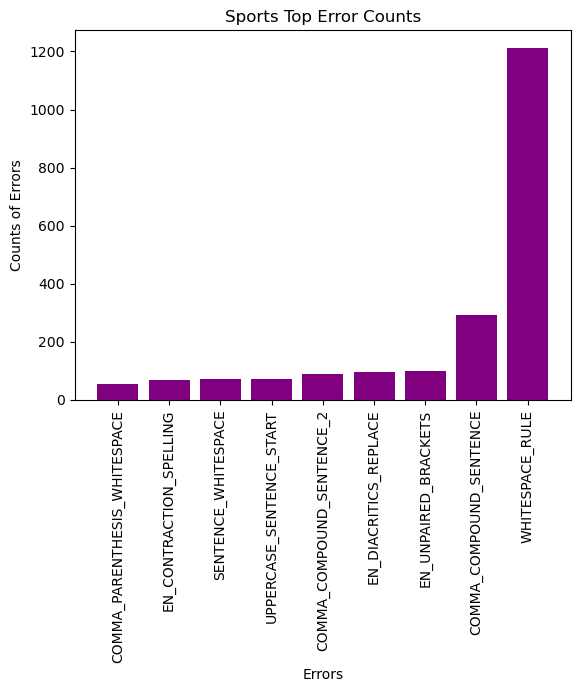

In [29]:
x = [x[0] for x in sp][1013:]
y = [x[1] for x in sp][1013:]
plt.title("Sports Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.xticks(rotation = 90)
plt.bar(x, y, color = 'purple')

### Legal Advice

In [30]:
le.sort(key = lambda x: x[1])
le[1013:]

[('POSSESSIVE_APOSTROPHE', 83),
 ('COMMA_PARENTHESIS_WHITESPACE', 118),
 ('EN_CONTRACTION_SPELLING', 143),
 ('EN_COMPOUNDS', 197),
 ('COMMA_COMPOUND_SENTENCE_2', 200),
 ('WHITESPACE_RULE', 282),
 ('UPPERCASE_SENTENCE_START', 391),
 ('I_LOWERCASE', 590),
 ('COMMA_COMPOUND_SENTENCE', 1776)]

<BarContainer object of 9 artists>

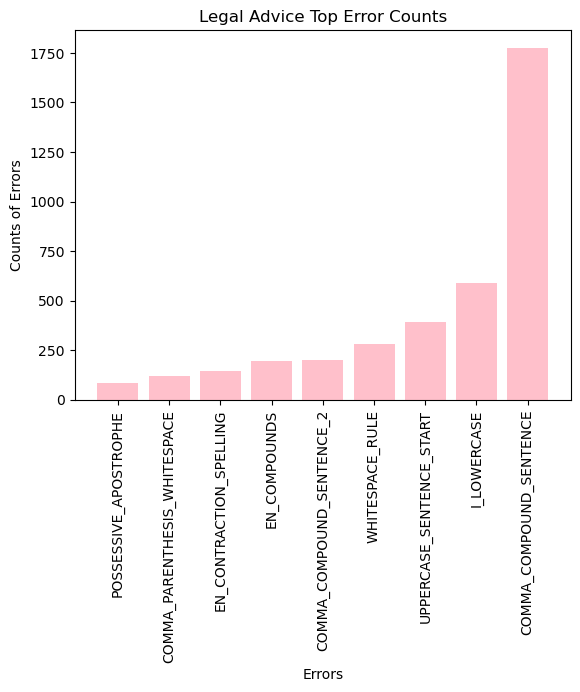

In [80]:
x = [x[0] for x in le][1013:]
y = [x[1] for x in le][1013:]
plt.xticks(rotation = 90)
plt.title("Legal Advice Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'pink')

### Adulting

In [32]:
ad.sort(key = lambda x: x[1])
ad[1013:]

[('DOUBLE_PUNCTUATION', 66),
 ('COMMA_PARENTHESIS_WHITESPACE', 88),
 ('EN_CONTRACTION_SPELLING', 162),
 ('COMMA_COMPOUND_SENTENCE_2', 165),
 ('EN_COMPOUNDS', 169),
 ('UPPERCASE_SENTENCE_START', 361),
 ('WHITESPACE_RULE', 608),
 ('I_LOWERCASE', 714),
 ('COMMA_COMPOUND_SENTENCE', 1616)]

<BarContainer object of 9 artists>

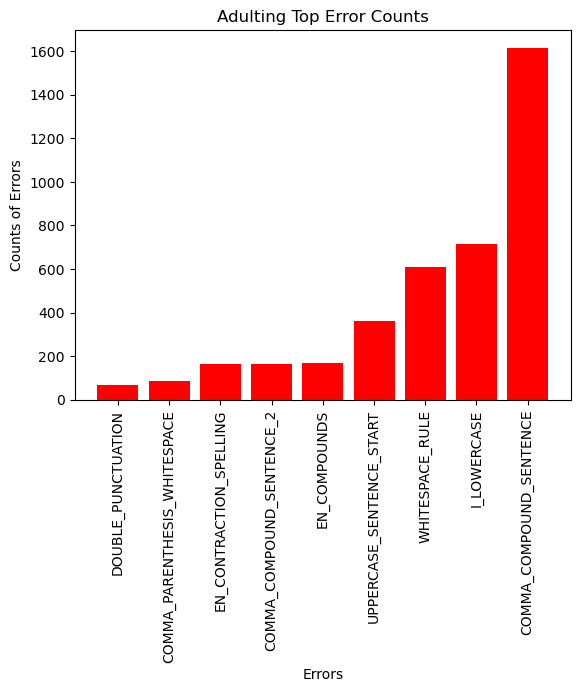

In [33]:
x = [x[0] for x in ad][1013:]
y = [x[1] for x in ad][1013:]
plt.xticks(rotation = 90)
plt.title("Adulting Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'red')

### Medicine 

In [34]:
med.sort(key = lambda x: x[1])
med[1013:]

[('I_LOWERCASE', 44),
 ('COMMA_PARENTHESIS_WHITESPACE', 48),
 ('EN_UNPAIRED_BRACKETS', 53),
 ('COMMA_COMPOUND_SENTENCE_2', 76),
 ('EN_CONTRACTION_SPELLING', 81),
 ('UPPERCASE_SENTENCE_START', 104),
 ('EN_COMPOUNDS', 115),
 ('WHITESPACE_RULE', 397),
 ('COMMA_COMPOUND_SENTENCE', 483)]

<BarContainer object of 9 artists>

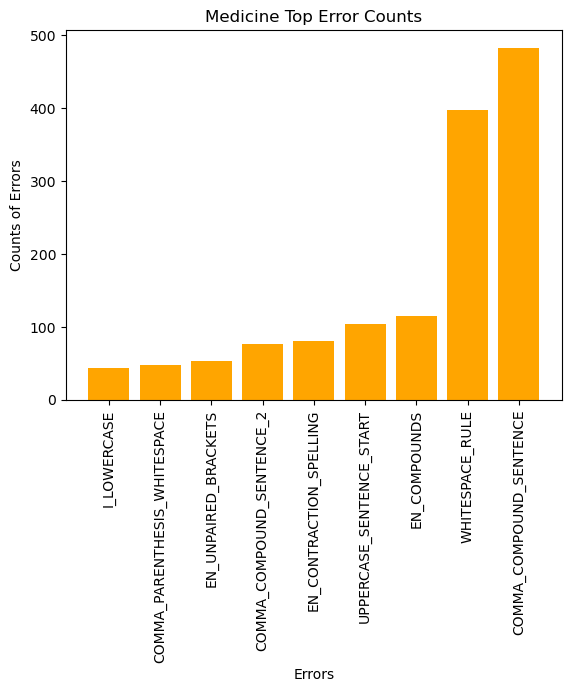

In [35]:
x = [x[0] for x in med][1013:]
y = [x[1] for x in med][1013:]
plt.xticks(rotation = 90)
plt.title("Medicine Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'orange')

### High School

In [36]:
hs.sort(key = lambda x: x[1])
hs[1013:]

[('WANNA', 81),
 ('GONNA', 89),
 ('COMMA_PARENTHESIS_WHITESPACE', 104),
 ('COMMA_COMPOUND_SENTENCE_2', 127),
 ('WHITESPACE_RULE', 205),
 ('EN_CONTRACTION_SPELLING', 264),
 ('UPPERCASE_SENTENCE_START', 783),
 ('COMMA_COMPOUND_SENTENCE', 1220),
 ('I_LOWERCASE', 1371)]

<BarContainer object of 9 artists>

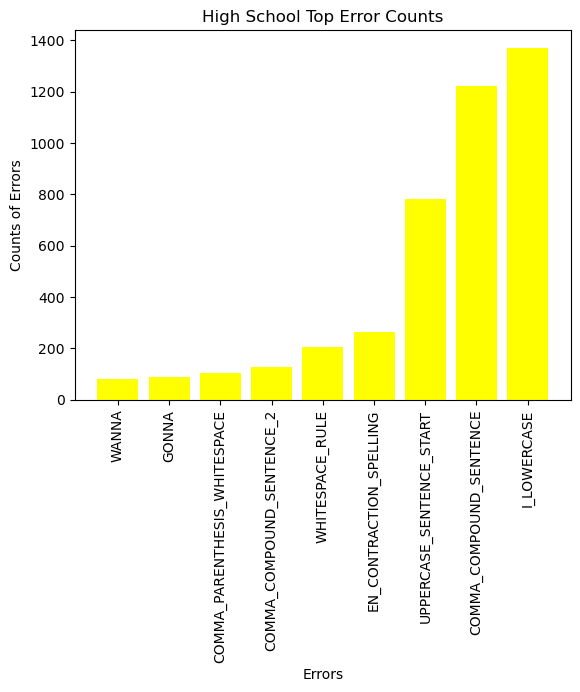

In [37]:
x = [x[0] for x in hs][1013:]
y = [x[1] for x in hs][1013:]
plt.xticks(rotation = 90)
plt.title("High School Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'yellow')

### Broadway

In [38]:
bway.sort(key = lambda x: x[1])
bway[1013:]

[('SENT_START_CONJUNCTIVE_LINKING_ADVERB_COMMA', 51),
 ('EN_COMPOUNDS', 57),
 ('COMMA_PARENTHESIS_WHITESPACE', 71),
 ('EN_DIACRITICS_REPLACE', 100),
 ('COMMA_COMPOUND_SENTENCE_2', 117),
 ('I_LOWERCASE', 144),
 ('WHITESPACE_RULE', 159),
 ('UPPERCASE_SENTENCE_START', 232),
 ('COMMA_COMPOUND_SENTENCE', 776)]

<BarContainer object of 9 artists>

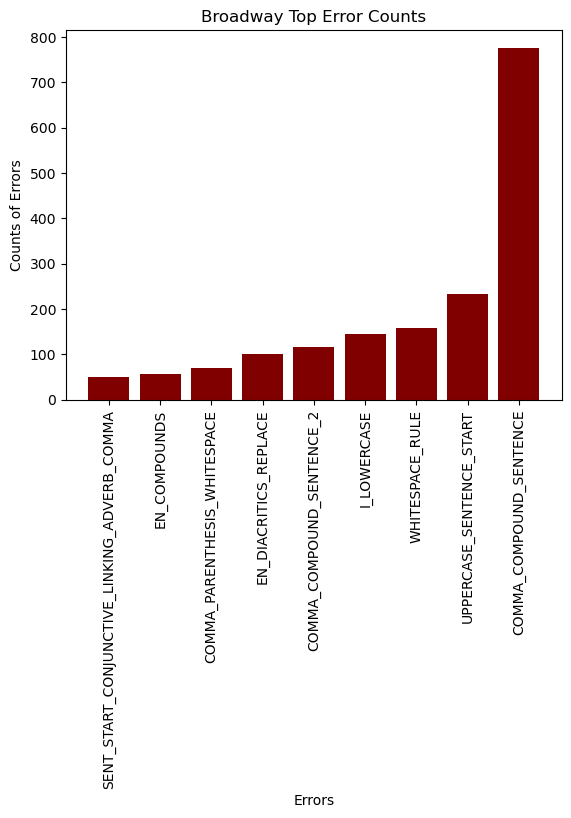

In [39]:
x = [x[0] for x in bway][1013:]
y = [x[1] for x in bway][1013:]
plt.xticks(rotation = 90)
plt.title("Broadway Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'maroon')

### Pittsburgh

In [40]:
pgh.sort(key = lambda x: x[1])
pgh[1013:]

[('DOUBLE_PUNCTUATION', 36),
 ('COMMA_PARENTHESIS_WHITESPACE', 45),
 ('EN_COMPOUNDS', 56),
 ('I_LOWERCASE', 71),
 ('UPPERCASE_SENTENCE_START', 72),
 ('COMMA_COMPOUND_SENTENCE_2', 72),
 ('HE_VERB_AGR', 100),
 ('WHITESPACE_RULE', 141),
 ('COMMA_COMPOUND_SENTENCE', 420)]

<BarContainer object of 9 artists>

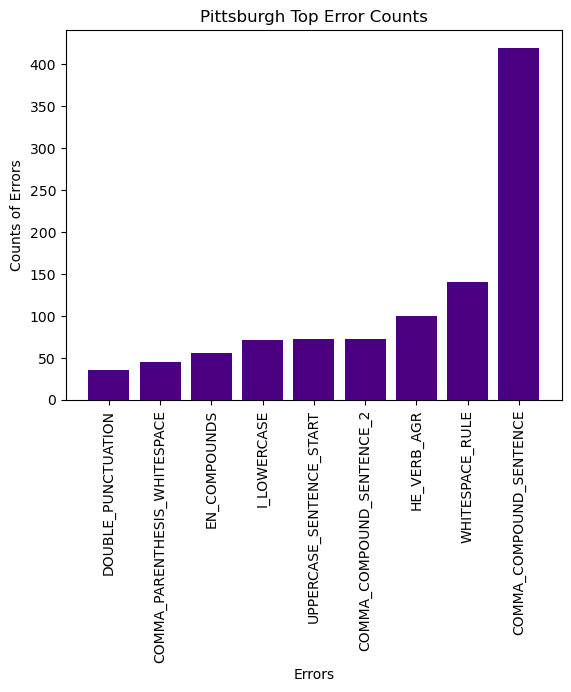

In [41]:
x = [x[0] for x in pgh][1013:]
y = [x[1] for x in pgh][1013:]
plt.xticks(rotation = 90)
plt.title("Pittsburgh Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'indigo')

### Rant

In [42]:
rant.sort(key = lambda x: x[1])
rant[1013:]

[('GONNA', 106),
 ('COMMA_PARENTHESIS_WHITESPACE', 168),
 ('COMMA_COMPOUND_SENTENCE_2', 176),
 ('WHITESPACE_RULE', 247),
 ('EN_COMPOUNDS', 274),
 ('EN_CONTRACTION_SPELLING', 371),
 ('UPPERCASE_SENTENCE_START', 761),
 ('I_LOWERCASE', 1237),
 ('COMMA_COMPOUND_SENTENCE', 1661)]

<BarContainer object of 9 artists>

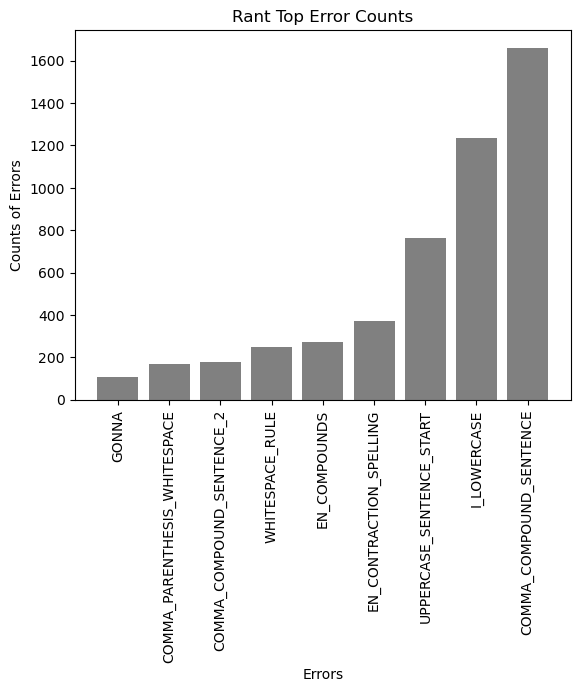

In [43]:
x = [x[0] for x in rant][1013:]
y = [x[1] for x in rant][1013:]
plt.xticks(rotation = 90)
plt.title("Rant Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'grey')

### Computer Science Career Questions

In [44]:
ccq.sort(key = lambda x: x[1])
ccq[1013:]

[('SENT_START_CONJUNCTIVE_LINKING_ADVERB_COMMA', 78),
 ('COMMA_PARENTHESIS_WHITESPACE', 86),
 ('COMMA_COMPOUND_SENTENCE_2', 123),
 ('UPPERCASE_SENTENCE_START', 126),
 ('EN_COMPOUNDS', 127),
 ('EN_CONTRACTION_SPELLING', 140),
 ('I_LOWERCASE', 303),
 ('WHITESPACE_RULE', 433),
 ('COMMA_COMPOUND_SENTENCE', 1039)]

<BarContainer object of 9 artists>

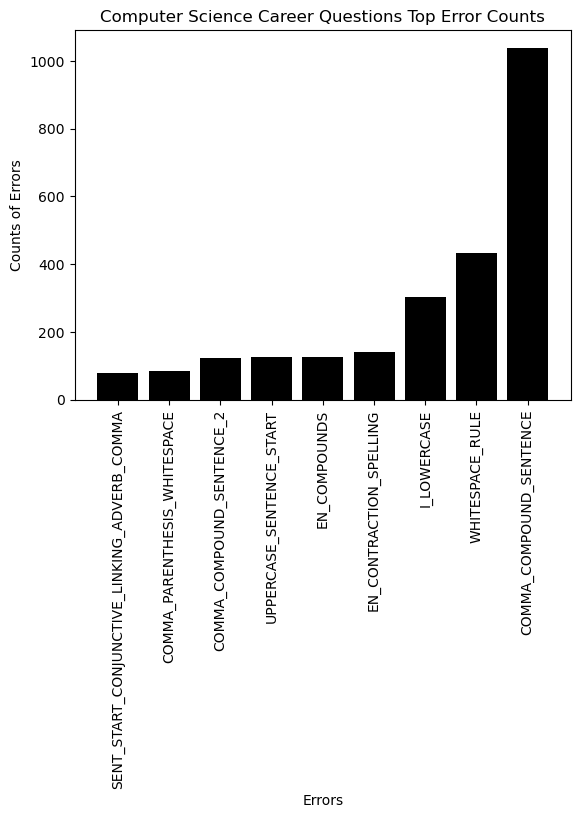

In [45]:
x = [x[0] for x in ccq][1013:]
y = [x[1] for x in ccq][1013:]
plt.xticks(rotation = 90)
plt.title("Computer Science Career Questions Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'black')

### Anime

In [46]:
ani.sort(key = lambda x: x[1])
ani[1013:]

[('EN_UNPAIRED_BRACKETS', 82),
 ('EN_COMPOUNDS', 89),
 ('EN_CONTRACTION_SPELLING', 105),
 ('COMMA_PARENTHESIS_WHITESPACE', 178),
 ('UPPERCASE_SENTENCE_START', 230),
 ('SENTENCE_WHITESPACE', 234),
 ('I_LOWERCASE', 319),
 ('WHITESPACE_RULE', 422),
 ('COMMA_COMPOUND_SENTENCE', 444)]

<BarContainer object of 9 artists>

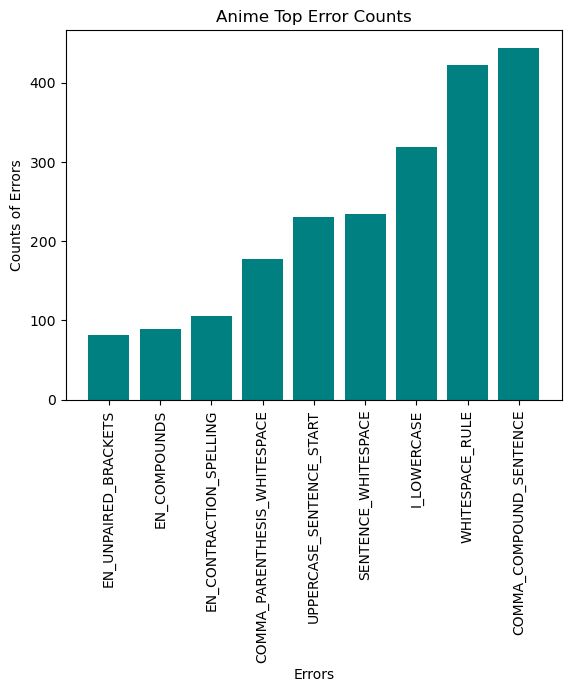

In [47]:
x = [x[0] for x in ani][1013:]
y = [x[1] for x in ani][1013:]
plt.xticks(rotation = 90)
plt.title("Anime Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'teal')

### Explain Like I'm Five

In [48]:
eli5.sort(key = lambda x: x[1])
eli5[1013:]

[('COMMA_PARENTHESIS_WHITESPACE', 23),
 ('UNIT_SPACE', 24),
 ('EN_COMPOUNDS', 29),
 ('EN_CONTRACTION_SPELLING', 48),
 ('WHITESPACE_RULE', 59),
 ('UPPERCASE_SENTENCE_START', 64),
 ('I_LOWERCASE', 78),
 ('COMMA_COMPOUND_SENTENCE_2', 89),
 ('COMMA_COMPOUND_SENTENCE', 219)]

<BarContainer object of 9 artists>

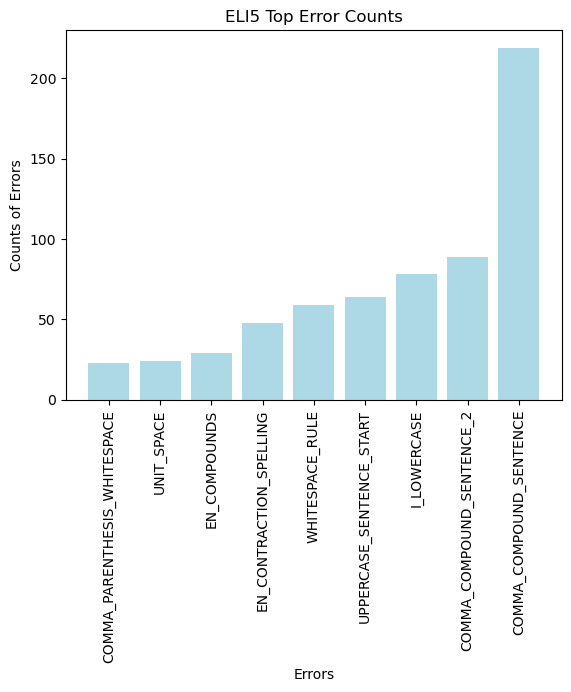

In [49]:
x = [x[0] for x in eli5][1013:]
y = [x[1] for x in eli5][1013:]
plt.xticks(rotation = 90)
plt.title("ELI5 Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'lightblue')

## Cryptocurrency 

In [50]:
cry.sort(key = lambda x: x[1])
cry[1013:]

[('EN_CONTRACTION_SPELLING', 138),
 ('EN_UNPAIRED_BRACKETS', 148),
 ('COMMA_COMPOUND_SENTENCE_2', 153),
 ('UPPERCASE_SENTENCE_START', 216),
 ('EN_COMPOUNDS', 216),
 ('I_LOWERCASE', 243),
 ('COMMA_PARENTHESIS_WHITESPACE', 273),
 ('COMMA_COMPOUND_SENTENCE', 858),
 ('WHITESPACE_RULE', 2555)]

<BarContainer object of 9 artists>

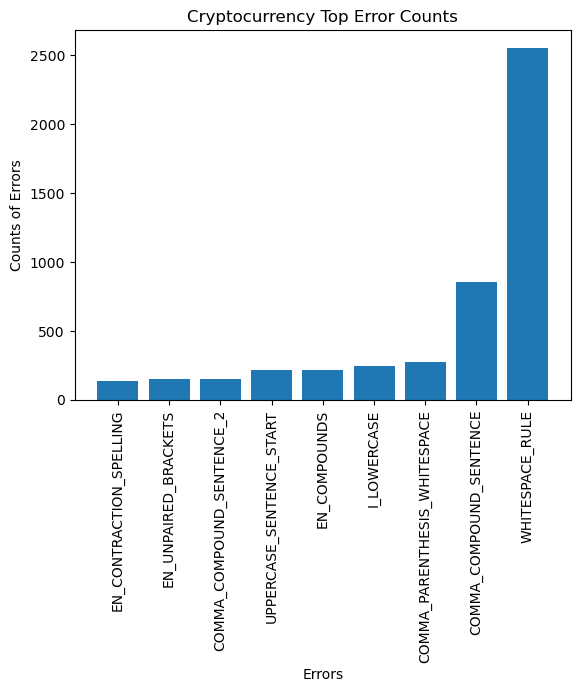

In [51]:
x = [x[0] for x in cry][1013:]
y = [x[1] for x in cry][1013:]
plt.xticks(rotation = 90)
plt.title("Cryptocurrency Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y)

### Lawyer Talk

In [52]:
law.sort(key = lambda x: x[1])
law[1013:]

[('AM_I', 45),
 ('EN_CONTRACTION_SPELLING', 55),
 ('HE_VERB_AGR', 58),
 ('COMMA_COMPOUND_SENTENCE_2', 90),
 ('EN_COMPOUNDS', 129),
 ('WHITESPACE_RULE', 157),
 ('UPPERCASE_SENTENCE_START', 159),
 ('I_LOWERCASE', 192),
 ('COMMA_COMPOUND_SENTENCE', 673)]

<BarContainer object of 9 artists>

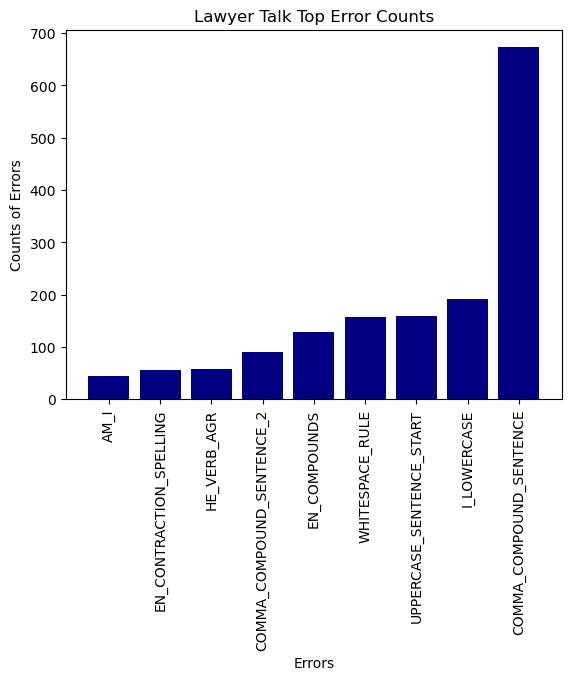

In [53]:
x = [x[0] for x in law][1013:]
y = [x[1] for x in law][1013:]
plt.xticks(rotation = 90)
plt.title("Lawyer Talk Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'navy')

### Gaming

In [54]:
gam.sort(key = lambda x: x[1])
gam[1013:]

[('EN_COMPOUNDS', 90),
 ('COMMA_PARENTHESIS_WHITESPACE', 122),
 ('COMMA_COMPOUND_SENTENCE_2', 126),
 ('EN_SPECIFIC_CASE', 168),
 ('EN_CONTRACTION_SPELLING', 181),
 ('WHITESPACE_RULE', 234),
 ('UPPERCASE_SENTENCE_START', 245),
 ('I_LOWERCASE', 398),
 ('COMMA_COMPOUND_SENTENCE', 619)]

<BarContainer object of 9 artists>

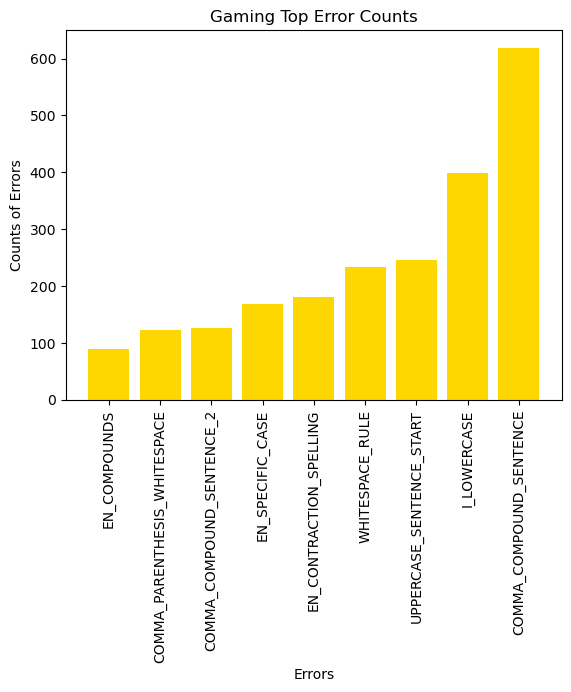

In [55]:
x = [x[0] for x in gam][1013:]
y = [x[1] for x in gam][1013:]
plt.xticks(rotation = 90)
plt.title("Gaming Top Error Counts")
plt.xlabel("Errors")
plt.ylabel("Counts of Errors")
plt.bar(x, y, color = 'gold')

## Normalization

In [62]:
# Gets the number of errors per post

def counts(subreddit):
    theCounts = []
    for x in subreddit:
        theCounts.append(len(x))
    return theCounts

In [88]:
# Number of errors per post for each subreddit
sportsC = counts(sportsErrors)
legalC = counts(legalErrors)
adultC = counts(adultErrors)
medC = counts(medErrors)
hsC = counts(hsErrors)
bwayC = counts(bwayErrors)
pghC = counts(pghErrors)
rantC = counts(rantErrors)
ccqC = counts(ccqErrors)
animeC = counts(animeErrors)
eli5C = counts(eli5Errors)
collegeC = counts(collegeErrors)
cryptoC = counts(cryptoErrors)
lawyerC = counts(lawyerErrors)
gamingC = counts(gamingErrors)

# Divide the sum of the number of errors by the number of errors there are
sc = sum(sportsC) / len(sportsC)
lc = sum(legalC) / len(legalC)
ac = sum(adultC) / len(adultC)
mc = sum(medC) / len(medC)
hc = sum(hsC) / len(hsC)
bc = sum(bwayC) / len(bwayC)
pc = sum(pghC) / len(pghC)
rc = sum(rantC) / len(rantC)
cc = sum(ccqC) / len(ccqC)
anc = sum(animeC) / len(animeC)
ec = sum(eli5C) / len(eli5C)
clc = sum(collegeC) / len(collegeC)
crc = sum(cryptoC) / len(cryptoC)
lyc = sum(lawyerC) / len(lawyerC)
gc = sum(gamingC) / len(gamingC)

cNormal = [sportsC, legalC, adultC, medC, hsC, bwayC, pghC, rantC, ccqC, animeC, eli5C, collegeC, cryptoC, lawyerC, gamingC]
countsNormal = [sc, lc, ac, mc, hc, bc, pc, rc, cc, anc, ec, clc, crc, lyc, gc]
[print(x) for x in countsNormal]
print()

8.241333333333333
4.806666666666667
5.338666666666667
3.304666666666667
5.5473333333333334
3.594
2.026666666666667
6.954
3.9226666666666667
9.900666666666666
1.194
4.3566666666666665
9.068
2.6286666666666667
4.158666666666667



The subreddits with the top 5 highest normalized error counts are:
 
1. Anime(9.900)

2. Cryptocurrency(9.068)

3. NBA (8.241)

4. Rant(6.954)

5. High School(5.547)

Let's visualize this!

<BarContainer object of 15 artists>

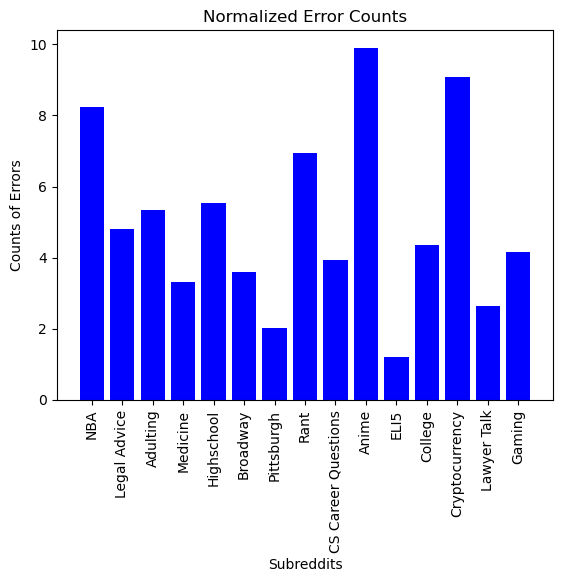

In [70]:
names = ['NBA', 'Legal Advice', 'Adulting', 'Medicine', 'Highschool', 'Broadway', 'Pittsburgh','Rant','CS Career Questions', 'Anime', 'ELI5','College', 'Cryptocurrency', 'Lawyer Talk', 'Gaming'] 
plt.xticks(rotation = 90)
plt.title("Normalized Error Counts")
plt.xlabel("Subreddits")
plt.ylabel("Counts of Errors")
plt.bar(names, countsNormal, color = 'blue')

There are many hypotheses as to why these subreddits may have higher or lower normalized error counts. It could simply be due to different post formatting rules that the parser does not like. For example, I know the NBA subreddit has a particular format for posting about games that involves a bunch of symbols, such as '////' which the parser may mark incorrectly for some rule.

## Top Error Analysis

Let's take a closer look at COMMA_COMPOUND_SENTENCE, as it is in the top 2 most common errors for all of the subreddits

In [91]:
sportsErrors[4]

[Match({'ruleId': 'COMMA_COMPOUND_SENTENCE', 'message': 'Use a comma before ‘and’ if it connects two independent clauses (unless they are closely connected and short).', 'replacements': [', and'], 'offsetInContext': 43, 'context': '.... “They’re still young, they’re talented and you can’t take anybody lightly, especia...', 'offset': 386, 'errorLength': 4, 'category': 'PUNCTUATION', 'ruleIssueType': 'typographical', 'sentence': "“They're still young, they're talented and you can't take anybody lightly, especially at this point in the season.”"}),
 Match({'ruleId': 'MORFOLOGIK_RULE_EN_US', 'message': 'Possible spelling mistake found.', 'replacements': ['Galen', 'Jaden', 'Jaylen', 'Jaén'], 'offsetInContext': 43, 'context': '...ul generation of the Rockets club. With Jalen Green, Alperen Sengun, and Jabari Smith...', 'offset': 619, 'errorLength': 5, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': 'With Jalen Green, Alperen Sengun, and Jabari Smith Jr., Houston is currently

"They're still young, they're talented and you can't take anybody lightly, especially at this point in the season."

"Obviously, James is one of the best players in that franchise's history and they brought on CP too."

"They had such a great team that almost knocked us off and I had a lot of respect for those Rockets teams and now I just feel old playing these young bucks"

These are just a few of the example sentences that the language tool believes is breaking the COMMA_COMPOUND_SENTENCE rule. In online discourse, it seems like this rule is most often forgotten. It could be that be due to a variety of reasons, such as someone not knowing where to appropriately place a comma in a compound sentence, or someone just not caring when it comes to online writing. In any case, it seems like this rule is the most forgotten across all of the subreddits. In fact, the ELI5 subreddit actually has COMMA_COMPOUND_SENTENCE as the top error and COMMA_COMPOUND_SENTENCE_2 as their second most common error. The COMMA_COMPOUND_SENTENCE_2 is shown below. It is a variation of the COMMA_COMPOUND_SENTENCE rule, but deals with the word 'but' instead of 'and'

In [96]:
eli5Errors[18]

[Match({'ruleId': 'COMMA_COMPOUND_SENTENCE_2', 'message': 'Use a comma before ‘but’ if it connects two independent clauses (unless they are closely connected and short).', 'replacements': [', but'], 'offsetInContext': 43, 'context': '... higher the zoom the higher the aperture but that is the best I understood from like...', 'offset': 57, 'errorLength': 4, 'category': 'PUNCTUATION', 'ruleIssueType': 'typographical', 'sentence': 'So apparently the higher the zoom the higher the aperture but that is the best I understood from like 10 different articles.'})]

Let's explore other errors that occur in the top 3 of each subreddit.

I_LOWERCASE is also another fairly common error. This one occurs when a person does not make 'I' uppercase. An example of this can be seen below. This error is most likely due to people either not caring or not realizing that it is not uppercase. In any case, a lowercase 'I' does not affect the meaning of the sentence while reading, and therefore people may not care enough to correct it.

In [146]:
gamingErrors[18][0]

Match({'ruleId': 'I_LOWERCASE', 'message': 'The personal pronoun “I” should be uppercase.', 'replacements': ['I'], 'offsetInContext': 7, 'context': 'How do i get batter at the game? I keep dying in...', 'offset': 7, 'errorLength': 1, 'category': 'TYPOS', 'ruleIssueType': 'misspelling', 'sentence': 'How do i get batter at the game?'})

UPPERCASE_SENTENCE_START can be seen below. The name implies what the error is, which is that a person does not uppercase the letter at the beginning of a sentence. The cause of this error can be hypothesized similarly to the error above, which is just due to the fact that not uppercasing the first letter of a sentence has no effect on the meaning of a sentence.

In [145]:
gamingErrors[59][2]

Match({'ruleId': 'UPPERCASE_SENTENCE_START', 'message': 'This sentence does not start with an uppercase letter.', 'replacements': ['Should'], 'offsetInContext': 43, 'context': "...k it looks like it would be a fun game. should i wait for a sale, or i shouldn't bothe...", 'offset': 142, 'errorLength': 6, 'category': 'CASING', 'ruleIssueType': 'typographical', 'sentence': "should i wait for a sale, or i shouldn't bother."})

COMMA_PARENTHESIS_WHITESPACE is regarding putting a space in between a word and a comma. This is a very simple error to make, just simply adding an extra space on accident. I don't think this has a huge effect on the grammaticality of a sentence.

In [144]:
cryptoErrors[28][0]

Match({'ruleId': 'COMMA_PARENTHESIS_WHITESPACE', 'message': 'Don’t put a space before the full stop.', 'replacements': ['.'], 'offsetInContext': 43, 'context': "...ance since June 2022 to reach almost 46% .  BTC's market share has increased after...", 'offset': 99, 'errorLength': 2, 'category': 'TYPOGRAPHY', 'ruleIssueType': 'whitespace', 'sentence': 'Bitcoin has reached new heights in terms of market dominance since June 2022 to reach almost 46% .'})

WHITESPACE_RULE is similar to the error above. It just entails adding an additional space in between words. Again, this doesn't tell me a lot about the grammaticality of a post.

In [155]:
animeErrors[12][6]

Match({'ruleId': 'WHITESPACE_RULE', 'message': 'Possible typo: you repeated a whitespace', 'replacements': [' '], 'offsetInContext': 43, 'context': '...f the spoilers within the parenthesis:      e.g., [Manga Chapter 50 Onwards] >!Spoil...', 'offset': 1342, 'errorLength': 4, 'category': 'TYPOGRAPHY', 'ruleIssueType': 'whitespace', 'sentence': 'e.g., [Manga Chapter 50 Onwards] >!'})

## Comparison Across Subreddits

Let's compare errors across subreddits. Specifically, which errors are unique to a subreddit?

In [170]:
# Gets the set of the top errors 
a = set([x[0] for x in sp][1013:])
b = set([x[0] for x in le][1013:])
c = set([x[0] for x in ad][1013:])
d = set([x[0] for x in med][1013:])
e = set([x[0] for x in hs][1013:])
f = set([x[0] for x in bway][1013:])
g = set([x[0] for x in pgh][1013:])
h = set([x[0] for x in rant][1013:])
i = set([x[0] for x in ccq][1013:])
j = set([x[0] for x in ani][1013:])
k = set([x[0] for x in eli5][1013:])
l = set([x[0] for x in col][1013:])
m = set([x[0] for x in cry][1013:])
n = set([x[0] for x in law][1013:])
o = set([x[0] for x in gam][1013:])

# Gets the difference of a subreddit's top errors compared to all errors (finding unique errors)
col, sp, le, ad, med, hs, bway, pgh, rant, ccq, ani, eli5, cry, law, gam
aa = a.difference(set(list(b) + list(c) + list(d) + list(e) + list(f) + list(g) + list(h) + list(i) + list(j) + list(k) + list(l) + list(m) + list(n) + list(o)))
bb = b.difference(set(list(a) + list(c) + list(d) + list(e) + list(f) + list(g) + list(h) + list(i) + list(j) + list(k) + list(l) + list(m) + list(n) + list(o)))
cc = c.difference(set(list(b) + list(a) + list(d) + list(e) + list(f) + list(g) + list(h) + list(i) + list(j) + list(k) + list(l) + list(m) + list(n) + list(o)))
dd = d.difference(set(list(b) + list(c) + list(a) + list(e) + list(f) + list(g) + list(h) + list(i) + list(j) + list(k) + list(l) + list(m) + list(n) + list(o)))
ee = e.difference(set(list(b) + list(c) + list(d) + list(a) + list(f) + list(g) + list(h) + list(i) + list(j) + list(k) + list(l) + list(m) + list(n) + list(o)))
ff = f.difference(set(list(b) + list(c) + list(d) + list(e) + list(a) + list(g) + list(h) + list(i) + list(j) + list(k) + list(l) + list(m) + list(n) + list(o)))
gg = g.difference(set(list(b) + list(c) + list(d) + list(e) + list(f) + list(a) + list(h) + list(i) + list(j) + list(k) + list(l) + list(m) + list(n) + list(o)))
hh = h.difference(set(list(b) + list(c) + list(d) + list(e) + list(f) + list(g) + list(a) + list(i) + list(j) + list(k) + list(l) + list(m) + list(n) + list(o)))
ii = i.difference(set(list(b) + list(c) + list(d) + list(e) + list(f) + list(g) + list(h) + list(a) + list(j) + list(k) + list(l) + list(m) + list(n) + list(o)))
jj = j.difference(set(list(b) + list(c) + list(d) + list(e) + list(f) + list(g) + list(h) + list(i) + list(a) + list(k) + list(l) + list(m) + list(n) + list(o)))
kk = k.difference(set(list(b) + list(c) + list(d) + list(e) + list(f) + list(g) + list(h) + list(i) + list(j) + list(a) + list(l) + list(m) + list(n) + list(o)))
ll = l.difference(set(list(b) + list(c) + list(d) + list(e) + list(f) + list(g) + list(h) + list(i) + list(j) + list(k) + list(a) + list(m) + list(n) + list(o)))
mm = m.difference(set(list(b) + list(c) + list(d) + list(e) + list(f) + list(g) + list(h) + list(i) + list(j) + list(k) + list(l) + list(a) + list(n) + list(o)))
nn = n.difference(set(list(b) + list(c) + list(d) + list(e) + list(f) + list(g) + list(h) + list(i) + list(j) + list(k) + list(l) + list(m) + list(a) + list(o)))
oo = o.difference(set(list(b) + list(c) + list(d) + list(e) + list(f) + list(g) + list(h) + list(i) + list(j) + list(k) + list(l) + list(m) + list(n) + list(a)))                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           

In [171]:
print('NBA : ' + str(list(aa)))
print('Legal Advice : ' + str(list(bb))) 
print('Adulting : ' + str(list(cc))) 
print('Medicine : ' + str(list(dd))) 
print('Highschool : ' + str(list(ee))) 
print('Broadway : ' + str(list(ff))) 
print('Pittsburgh : ' + str(list(gg))) 
print('Rant : ' + str(list(hh))) 
print('CCQ : ' + str(list(ii))) 
print('Anime : ' + str(list(jj))) 
print('ELI5 : ' + str(list(kk))) 
print('College : ' + str(list(ll))) 
print('Cryptocurrency : ' + str(list(mm))) 
print('Lawyer Talk : ' + str(list(nn))) 
print('Gaming : ' + str(list(oo))) 

NBA : []
Legal Advice : ['POSSESSIVE_APOSTROPHE']
Adulting : []
Medicine : []
Highschool : []
Broadway : []
Pittsburgh : []
Rant : []
CCQ : []
Anime : []
ELI5 : ['UNIT_SPACE']
College : []
Cryptocurrency : []
Lawyer Talk : ['AM_I']
Gaming : ['EN_SPECIFIC_CASE']


POSSESSIVE_APOSTROPHE, UNIT_SPACE, AM_I, and EN_SPECIFIC_CASE are all unique top errors in a subreddit. Let's take a closer look at these errors.

#### Possessive Apostrophe

In [74]:
val = 0
for x in legalErrors:
    for y in x:
        if y.ruleId == 'POSSESSIVE_APOSTROPHE':
            print(y)
            val = 1
            break
    if val == 1:
        break

Offset 271, length 11, Rule ID: POSSESSIVE_APOSTROPHE
Message: An apostrophe may be missing.
Suggestion: withdrawals'; withdrawal's
...hanged the online log in, increased the withdrawals allowance, moved money from her saving ...
                                           ^^^^^^^^^^^


This error is unique to the top errors of Legal Advice. I have no hypothesis on why this subreddit may have a higher number of missing possessive apostrophes, but it may be that possessive apostrophes occur more in these posts. More specifically, this could be due to people asking for legal advice about their own self and belongings.

#### Unit Space

In [76]:
val = 0
for x in eli5Errors:
    for y in x:
        if y.ruleId == 'UNIT_SPACE':
            print(y)
            val = 1
            break
    if val == 1:
        break

Offset 145, length 6, Rule ID: UNIT_SPACE
Message: Insert a space between the numerical value and the unit symbol.
Suggestion: 1200 kg
...as faster and felt more powerful than a 1200kg car that had 70 kW power.
                                           ^^^^^^


This error is unique to the top errors of ELI5. This could be due to the fact that this subreddit receives a lot of science related questions, which could contain more posts with units.

#### Am I

In [77]:
val = 0
for x in lawyerErrors:
    for y in x:
        if y.ruleId == 'AM_I':
            print(y)
            val = 1
            break
    if val == 1:
        break

Offset 74, length 2, Rule ID: AM_I
Message: Did you mean “am I” or “I am”?
Suggestion: am I; I am
...ith long airline flights next month and am looking for a couple of books that will...
                                           ^^


This error is unique to the top errors of Lawyer Talk. I have no solid hypothesis on why this occurs more frequently in this subreddit, but it is very interesting.

#### EN Specific Case

In [169]:
val = 0
for x in gamingErrors:
    for y in x:
        if y.ruleId == 'EN_SPECIFIC_CASE':
            print(y)
            val = 1
            break
    if val == 1:
        break

Offset 140, length 13, Rule ID: EN_SPECIFIC_CASE
Message: If the term is a proper noun, use initial capitals.
Suggestion: Halo Infinite
...ges with a toy gun. Yes including Doom. Halo infinite also has a slightly underwhelming hitma...
                                           ^^^^^^^^^^^^^


This error is unique to the top errors of Gaming. This subreddit contains a lot of names of videogames, which need to be capitalized, which is why this error occurs so often.

## Upvote Analysis

Now we will move into analysis regarding upvotes. Specifically, is there any correlation between errors and the number of upvotes?

In [64]:
# Counting the upvotes of each post on each subreddit
def countUpvotes(subreddit):
    theCounts = []
    for x,y in subreddit.iterrows():
        theCounts.append(y['Number of upvotes'])
    return theCounts

def countUpvotes2(subreddit):
    theCounts = []
    for x,y in subreddit.iterrows():
        theCounts.append(y['Number of Upvotes'])
    return theCounts

In [65]:
# New dataframes so that we don't mess anything up with the original ones...

legalAdvice2 = pd.read_csv("../final-data/finalLegalData.csv", index_col = 0)
adulting2 = pd.read_csv('../final-data/finalAdData.csv', index_col = 0)
medicine2 = pd.read_csv('../final-data/finalMedData.csv', index_col = 0)
highschool2 = pd.read_csv('../final-data/finalHsData.csv', index_col = 0)
broadway2 = pd.read_csv('../final-data/finalBwayData.csv', index_col = 0)
pittsburgh2 = pd.read_csv('../final-data/finalPghData.csv', index_col = 0)
rant2 = pd.read_csv('../final-data/finalRantData.csv', index_col = 0)
ccq2 = pd.read_csv('../final-data/finalCcqData.csv', index_col = 0)
anime2 = pd.read_csv('../final-data/finalAnimeData.csv', index_col = 0)
eli52 = pd.read_csv('../final-data/finalElifData.csv', index_col = 0)
college2 = pd.read_csv('../final-data/finalCollegeData.csv', index_col = 0)
sports2 = pd.read_csv('../final-data/finalSportsData.csv', index_col = 0)
crypto2 = pd.read_csv('../final-data/finalCryptoData.csv', index_col = 0)
lawyertalk2 = pd.read_csv('../final-data/finalLawyerData.csv', index_col = 0)
gaming2 = pd.read_csv('../final-data/finalGamingData.csv', index_col = 0)

In [156]:
# Count the number of upvotes for each post in each subreddit
lglUpvotes = countUpvotes(legalAdvice2) 
adultUpvotes = countUpvotes(adulting2)
medUpvotes = countUpvotes(medicine2) 
hsUpvotes = countUpvotes(highschool2)
bwayUpvotes = countUpvotes(broadway2) 
pghUpvotes = countUpvotes(pittsburgh2)
rantUpvotes = countUpvotes(rant2 )
ccqUpvotes = countUpvotes(ccq2 )
aniUpvotes = countUpvotes(anime2)
eli5Upvotes = countUpvotes(eli52 )
colUpvotes = countUpvotes(college2 )
sportsUpvotes = countUpvotes(sports2 )
cryUpvotes = countUpvotes2(crypto2)
lwyUpvotes = countUpvotes2(lawyertalk2) 
gamUpvotes = countUpvotes2(gaming2 )

# Append them all into a list
upvotesList = [lglUpvotes, adultUpvotes, medUpvotes, hsUpvotes, bwayUpvotes, pghUpvotes, rantUpvotes, ccqUpvotes, aniUpvotes, eli5Upvotes, colUpvotes, sportsUpvotes, cryUpvotes, lwyUpvotes, gamUpvotes]

# Diving the number of total upvotes by the number of posts
lu = sum(lglUpvotes) / len(lglUpvotes)
au = sum(adultUpvotes) / len(adultUpvotes)
mu = sum(medUpvotes) / len(medUpvotes)
hu = sum(hsUpvotes) / len(hsUpvotes)
bu = sum(bwayUpvotes) / len(bwayUpvotes)
pu = sum(pghUpvotes) / len(pghUpvotes)
ru = sum(rantUpvotes) / len(rantUpvotes)
cu = sum(ccqUpvotes) / len(ccqUpvotes)
aau = sum(aniUpvotes) / len(aniUpvotes)
eu = sum(eli5Upvotes) / len(eli5Upvotes)
ccu = sum(colUpvotes) / len(colUpvotes)
su = sum(sportsUpvotes) / len(sportsUpvotes)
cru = sum(cryUpvotes) / len(cryUpvotes)
lyu = sum(lwyUpvotes) / len(lwyUpvotes)
gu = sum(gamUpvotes) / len(gamUpvotes)

allUpvotes = [su, lu, au, mu, hu, bu, pu, ru, cu, aau, eu, ccu, cru, lyu, gu]

[print(x) for x in allUpvotes]
print()

596.138
23.198
33.404
204.322
3.945333333333333
19.066666666666666
21.674
25.950666666666667
33.87
107.086
179.73666666666668
30.923333333333332
44.408
13.79
157.40733333333333



The subreddits with the top 5 highest normalized upvote counts are:
 
1. NBA(596.138)

2. Medicine(204.322)

3. ELI5(179.736)

4. Gaming(157.407)

5. Anime(107.086)

Let's visualize this!

In [68]:
names = ['NBA', 'Legal Advice', 'Adulting', 'Medicine', 'Highschool', 'Broadway', 'Pittsburgh','Rant','CS Career Questions', 'Anime', 'ELI5','College', 'Cryptocurrency', 'Lawyer Talk', 'Gaming'] 
df2 = pd.DataFrame(columns= ['Subreddit', 'Normalized Counts' 'Normalized Upvotes'])
df2['Subreddit'] = names
df2['Normalized Counts'] = countsNormal
df2['Normalized Upvotes'] =  allUpvotes

<BarContainer object of 15 artists>

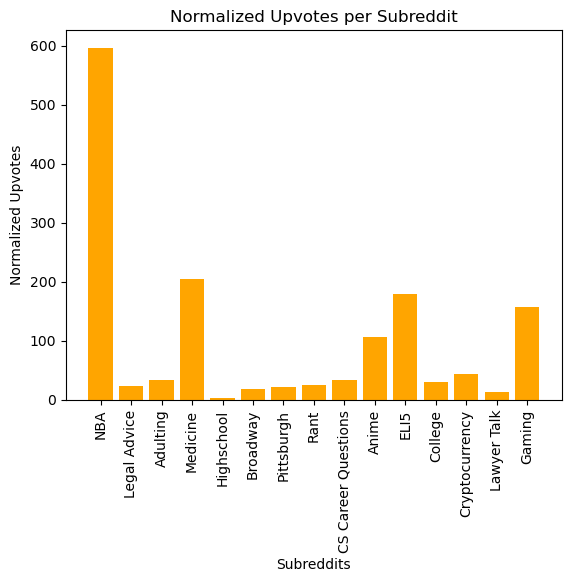

In [69]:
plt.xticks(rotation = 90)
plt.title("Normalized Upvotes per Subreddit")
plt.xlabel("Subreddits")
plt.ylabel("Normalized Upvotes")
plt.bar(names, allUpvotes, color = 'orange')

Let's compare the top 5 normalized error counts to the top 5 normalized upvote counts

**Normalized Error Counts**: Anime(9.900), Cryptocurrency(9.068), NBA (8.241), Rant(6.954), High School(5.547)

**Normalized Upvote Counts**: NBA(596.138), Medicine(204.322), ELI5(179.736), Gaming(157.407), Anime(107.086)

There are only two subreddits that have both high error counts and high upvote counts. In general, comparing the two graphs, some subreddits have a lot of errors but low upvotes, such as cryptocurrency. Conversely, some subreddits have a low amount of errors but high number of upvotes, such as ELI5. Therefore, the conclusion I have come to is that the number of errors has no impact on the number of upvotes. 

## Summary

What have I discovered? Well, it seems like the language tool, while overall beneficial, also has its own issues in regards to what I am trying to analyze. Specifically, this tool is not equipped to deal with people's names, internet slang, or regional words. It marks these words as errors, which is not helpful for my analysis. In addition, it often has an issue with the way sentences are formatted, such as adding an additional space in between words. Although this is an error when parsing, it is not a helpful error for my project. 

However, I did uncover some interesting things about the top errors of the subreddits. COMMA_COMPOUND_SENTENCE is extremely prevalent in all of the subreddits. In fact, if you look at the graphs, this error is often times much larger than any other error in the graph. This error is when a person does not include a comma in a compound sentence. This shows me that people often either do not know or do not feel that a comma in their compound sentence is important enough to include. This is interesting, as a lack of comma could sometimes lead to a change in the meaning of a sentence.

In regards to the comparison across subreddits, there are certain top errors that are unique to a few subreddits. Some of the reasons for this are obvious, such as the names of games in the Gaming subreddit needing to be capitalized, and others aren't as obvious, such as people forgetting to put "I" in front of "am" in sentences. This is a really interesting insight, as it shows that grammaticality across different subreddits has some level of uniqueness.

Finally, taking a look at the connection of the number of upvotes and the number of upvotes in a post. As the results showed, there is no real connection between these two groups. There are some subreddits that have a higher number of errors and lower number of upvotes, and vice versa. This can be due to several things, such as a subreddit having not as many frequent posts and therefore posts receive more attention and upvotes.